<a href="https://colab.research.google.com/github/Teacher-Heiko/fastbook/blob/master/Display_feature_maps_of_CNN_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Define the convolution function
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

# Define the imshow function
def imshow(img, cmap='gray', title=None):
    if img.requires_grad:
        img = img.detach()
    img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
    npimg = img.numpy()
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.show()

# Download and prepare the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

### one forward pass thru one conv layer ###


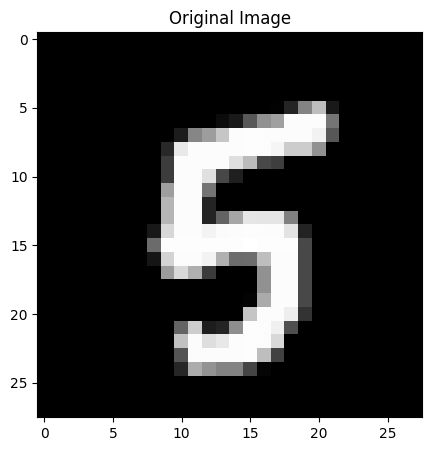

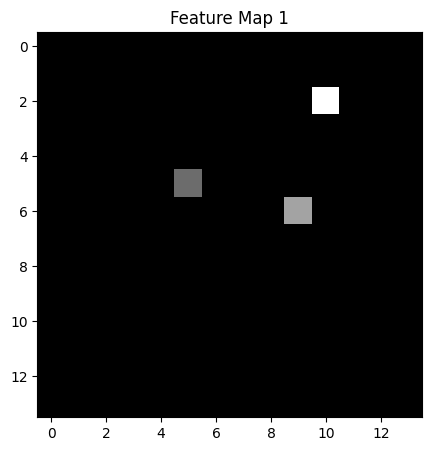

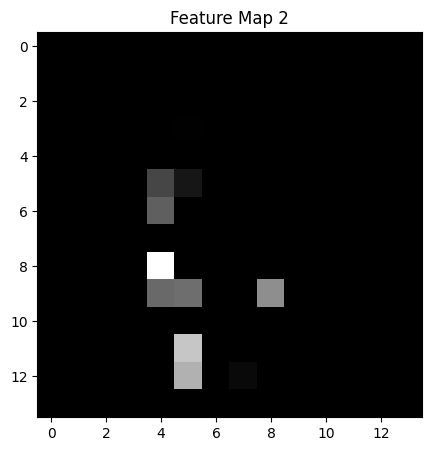

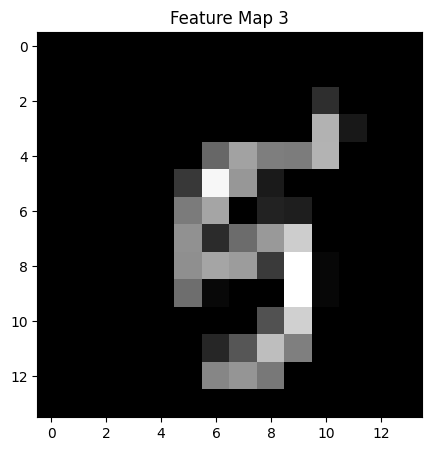

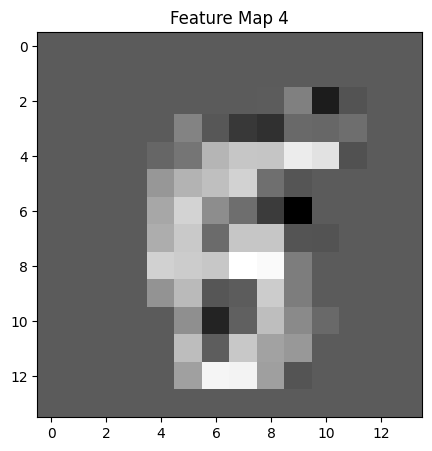

In [16]:
# Define the simple CNN model
def simple_cnn():
    return nn.Sequential(
        conv(1, 4)  # 1 input channel, 4 output channels
    )

model = simple_cnn()

# Get a batch of data and pass it through the model
images, labels = next(iter(dataloader))
feature_maps = model(images)

# Display the first input image
imshow(images[0], cmap='gray', title='Original Image')

# Display all feature maps (from the first image)
num_feature_maps = feature_maps.size(1)
for i in range(num_feature_maps):
    feature_map = feature_maps[0, i].unsqueeze(0)
    title = f'Feature Map {i+1}'
    imshow(feature_map, cmap='gray', title=title)



In [17]:
import pandas as pd


# Access the weights of the convolutional layer
weights = model[0][0].weight.data if isinstance(model[0], nn.Sequential) else model[0].weight.data


# Display weights in a table
num_filters = weights.size(0)
for i in range(num_filters):
    print(f"Filter {i+1} Weights:")
    filter_weights = weights[i].squeeze().numpy()
    df = pd.DataFrame(filter_weights)
    print(df)
    print("\n")

Filter 1 Weights:
          0         1         2
0 -0.143604  0.033077  0.206095
1 -0.291104  0.228039 -0.273424
2  0.070058  0.328543 -0.248211


Filter 2 Weights:
          0         1         2
0 -0.319299  0.214411  0.216423
1 -0.159034  0.108536 -0.152802
2 -0.045034 -0.322500  0.135689


Filter 3 Weights:
          0         1         2
0  0.044674  0.220525  0.075986
1  0.209703 -0.098438 -0.219574
2  0.028917  0.190255 -0.076244


Filter 4 Weights:
          0         1         2
0 -0.080562  0.171608  0.295807
1  0.329835 -0.043702 -0.184890
2 -0.250267 -0.124964  0.263099




### two conv layers ###

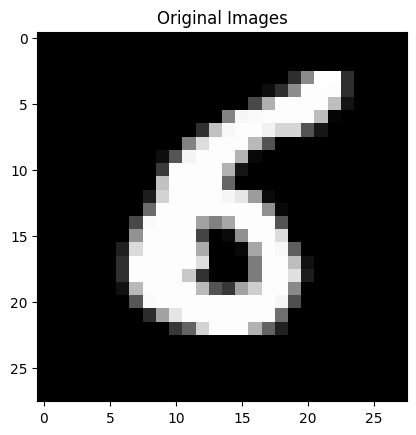

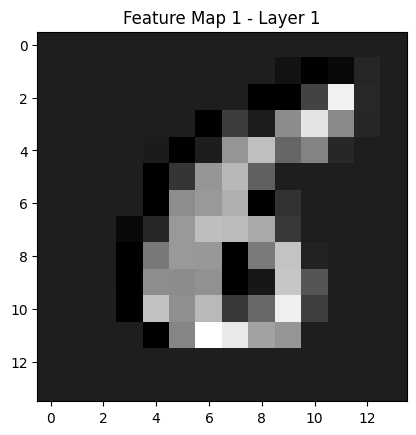

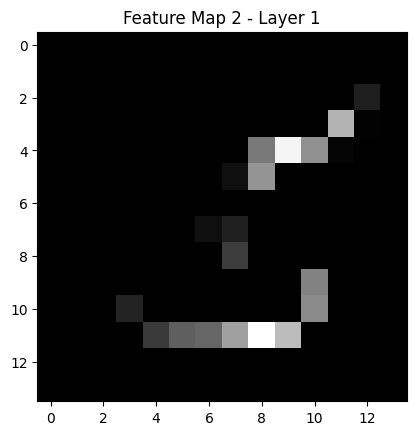

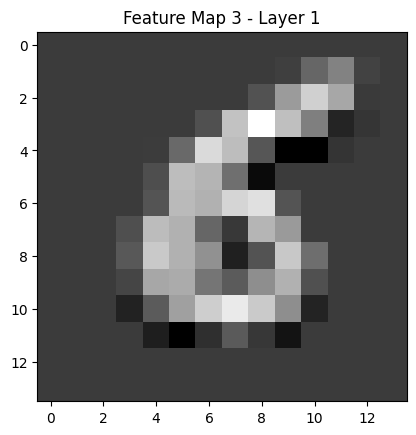

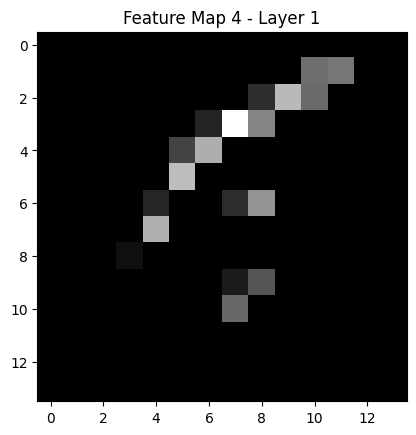

Filter 1 Weights:
          0         1         2
0  0.294361  0.232151 -0.235082
1 -0.193782  0.315726  0.199581
2  0.121646 -0.149684 -0.213219


Filter 2 Weights:
          0         1         2
0  0.320166 -0.189751  0.210360
1  0.143322 -0.026448 -0.208502
2 -0.268427 -0.188193 -0.201454


Filter 3 Weights:
          0         1         2
0 -0.301730  0.056896 -0.195460
1  0.219517  0.230885  0.114051
2  0.155670  0.110602  0.080633


Filter 4 Weights:
          0         1         2
0 -0.255604 -0.211895 -0.161686
1 -0.214334  0.325833 -0.018798
2 -0.018007  0.319225  0.138997




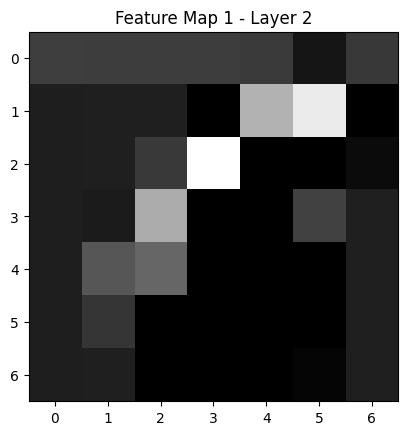

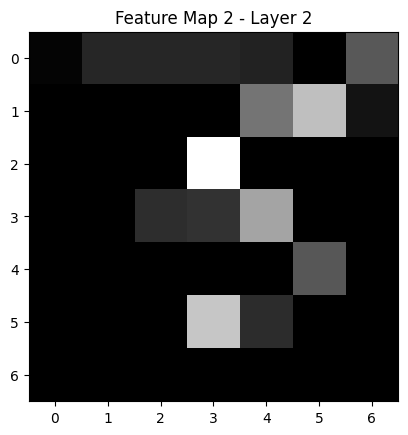

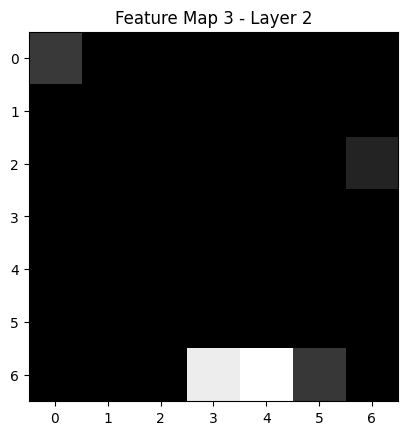

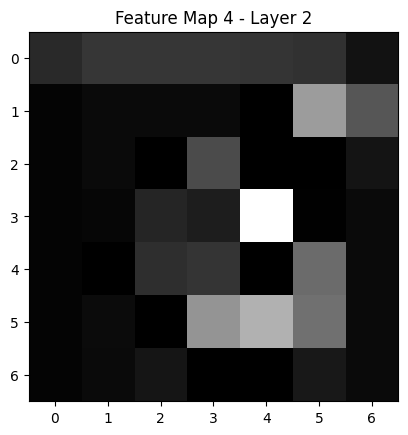

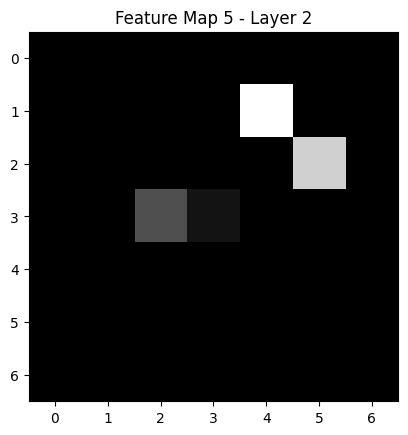

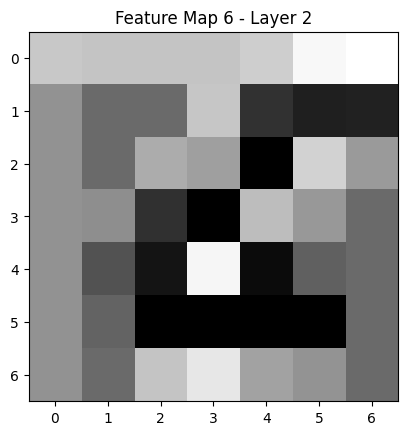

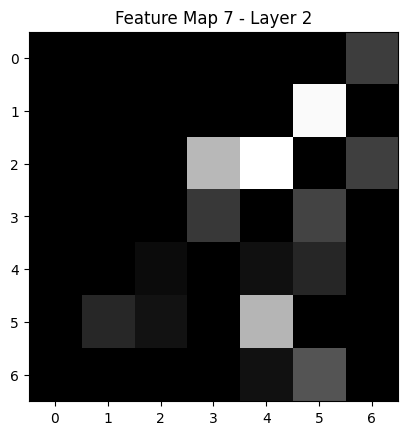

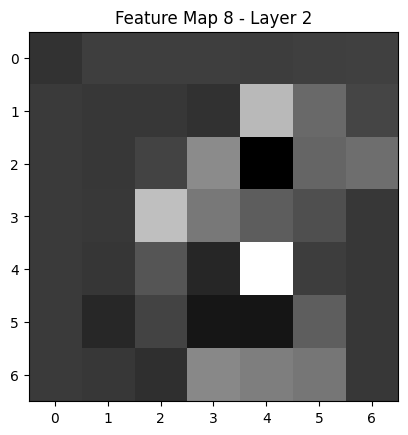

Filter 1 Weights:
Channel 1:
          0         1         2
0 -0.146163 -0.133326 -0.152178
1 -0.162471 -0.134913 -0.139862
2  0.066761 -0.088359  0.082663


Channel 2:
          0         1         2
0  0.159589  0.037554  0.014888
1  0.097881 -0.032720  0.022151
2 -0.097878 -0.082021 -0.096808


Channel 3:
          0         1         2
0  0.060577 -0.075751  0.088008
1 -0.059321  0.135938  0.145370
2  0.095524 -0.078805  0.031762


Channel 4:
          0         1         2
0  0.093791  0.153360  0.001980
1  0.161858 -0.029356  0.043853
2 -0.099756  0.021648 -0.142852


--------------

Filter 2 Weights:
Channel 1:
          0         1         2
0  0.082721 -0.155439 -0.127745
1  0.121195 -0.069592 -0.036566
2 -0.053048  0.019338  0.131827


Channel 2:
          0         1         2
0 -0.014560 -0.141530  0.107794
1  0.159393 -0.084186  0.021878
2 -0.023698  0.075192  0.118139


Channel 3:
          0         1         2
0 -0.065275 -0.061141 -0.104735
1  0.058398  0.160089  0.12

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd

# Define the convolution function
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    return nn.Sequential(*layers)

# Define the model
def simple_cnn():
    return nn.Sequential(
        conv(1, 4),  # 14x14
        conv(4, 8),  # 7x7
        nn.Flatten()
    )



# Load the data
transform = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)


# Initialize the model
model = simple_cnn()

# Get one image
images, labels = next(iter(dataloader))

# Pass the images through the model
feature_maps_1 = model[0](images)
feature_maps_2 = model[1](feature_maps_1)

# Function to display images
def imshow(img, cmap='gray', title=None):
    if img.requires_grad:
        img = img.detach()
    img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.show()

# Display the original images
imshow(torchvision.utils.make_grid(images), title="Original Images")

# Display feature maps of the first layer
for i in range(feature_maps_1.size(1)):
    title = f"Feature Map {i+1} - Layer 1"
    imshow(torchvision.utils.make_grid(feature_maps_1[:, i, :, :].unsqueeze(1)), title=title)

# Display weights of the first layer
weights_1 = model[0][0].weight.data

# Display weights in a table
num_filters = weights_1.size(0)
for i in range(num_filters):
    print(f"Filter {i+1} Weights:")
    filter_weights = weights_1[i].squeeze().numpy()
    df = pd.DataFrame(filter_weights)
    print(df)
    print("\n")


# Display feature maps of the second layer
for i in range(feature_maps_2.size(1)):
    title = f"Feature Map {i+1} - Layer 2"
    imshow(torchvision.utils.make_grid(feature_maps_2[:, i, :, :].unsqueeze(1)), title=title)

# Display weights of the second layer
weights_2 = model[1][0].weight.data

# Display weights in a table
num_filters = weights_2.size(0)
channels_per_filter = weights_2.size(1)
for i in range(num_filters):
    print(f"Filter {i+1} Weights:")
    for j in range(channels_per_filter):
        print(f"Channel {j+1}:")
        filter_weights = weights_2[i, j].numpy()
        df = pd.DataFrame(filter_weights)
        print(df)
        print("\n")
    print("--------------\n")



### forward and backward pass

Feature maps from first convolutional layer:


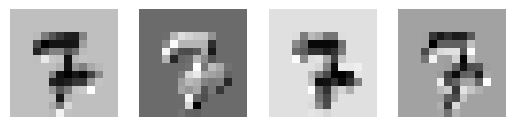

Feature maps from second convolutional layer:


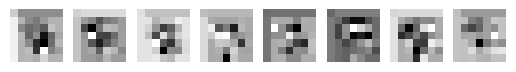

In [19]:
import matplotlib.pyplot as plt
import torch.optim as optim

# Initialize the model, loss function, and optimizer
model = simple_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model (for simplicity, only one batch is used)
images, labels = next(iter(dataloader))
outputs = model(images)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()




def visualize_feature_maps(feature_maps):
    # feature_maps shape: [num_filters, height, width]
    num_filters = feature_maps.size(0)
    for i in range(num_filters):
        plt.subplot(1, num_filters, i+1)
        plt.imshow(feature_maps[i].detach().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()

# Pass a batch of images through the model
images, labels = next(iter(dataloader))
outputs = model(images)

# Define hooks to get the feature maps from specific layers
def get_feature_maps_hook(self, input, output):
    feature_maps.append(output)

# Attach hooks to the convolutional layers
feature_maps = []
hook1 = model[0][0].register_forward_hook(get_feature_maps_hook)
hook2 = model[1][0].register_forward_hook(get_feature_maps_hook)

# Pass an image through the model to trigger the hooks and get the feature maps
output = model(images)

# Remove the hooks (important to avoid memory leaks)
hook1.remove()
hook2.remove()

# Visualize the feature maps
print("Feature maps from first convolutional layer:")
visualize_feature_maps(feature_maps[0][0])  # Display feature maps from first layer, first image

print("Feature maps from second convolutional layer:")
visualize_feature_maps(feature_maps[1][0])  # Display feature maps from second layer, first image
